<a href="https://colab.research.google.com/github/RayMose/bootstrapping-ml/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris

# Load the Boston dataset
boston = load_iris()

# This dataset is typically used for regression tasks, but for this exercise, we'll convert it to a classification task.


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with features and target variable
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Explore dataset
print(df.head())
print(df.info())
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

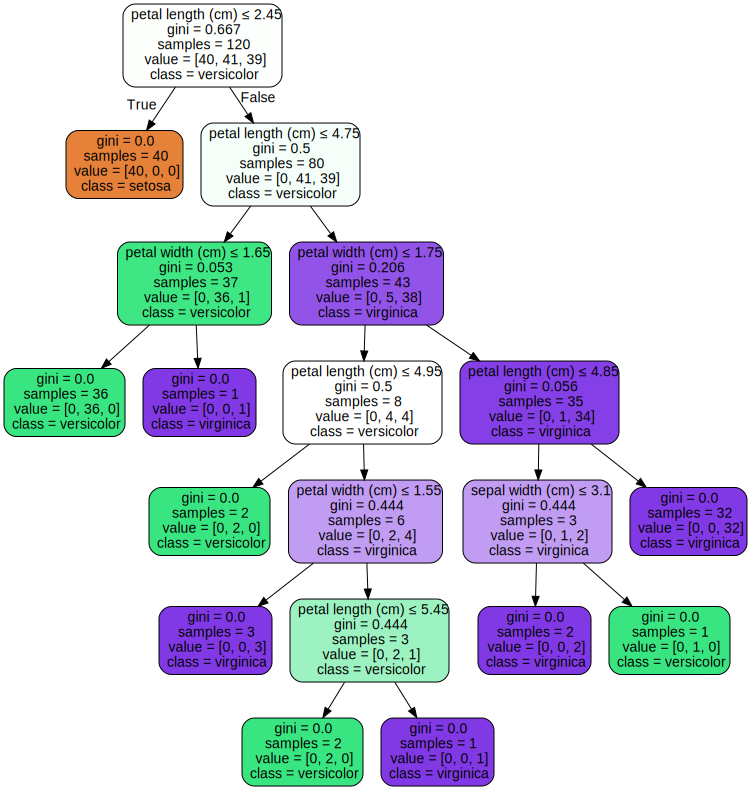

In [ ]:
# Visualize the Decision Tree (Note: This requires the Graphviz library)
# Install Graphviz: !pip install graphviz
# Additionally, install the Graphviz software from https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# Make sure to add the Graphviz bin folder to your system's PATH variable

from sklearn.tree import export_graphviz
import graphviz

# Export the tree in DOT format
dot_data = export_graphviz(tree_classifier, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Display the tree
graph


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
num_samples = 10

# Initialize a list to store the bootstrap samples
bootstrap_samples = []

# Create 10 bootstrap samples
for i in range(num_samples):
    # Generate random indices with replacement
    indices = np.random.randint(0, len(X_train), len(X_train))
    bootstrap_X = X_train.iloc[indices]
    bootstrap_y = y_train.iloc[indices]
    bootstrap_samples.append((bootstrap_X, bootstrap_y))


NameError: ignored

In [ ]:
# Initialize a list to store the decision tree models
tree_models = []

for bootstrap_X, bootstrap_y in bootstrap_samples:
    # Initialize and train a Decision Tree Classifier
    tree_classifier = DecisionTreeClassifier(random_state=42)
    tree_classifier.fit(bootstrap_X, bootstrap_y)
    tree_models.append(tree_classifier)


In [ ]:
# Make predictions on the test set using each tree
tree_predictions = []

for tree in tree_models:
    tree_predictions.append(tree.predict(X_test))

# Aggregate predictions
bagging_predictions = np.mean(tree_predictions, axis=0).round().astype(int)


In [ ]:
# Evaluate the bagging ensemble's performance
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
bagging_precision = precision_score(y_test, bagging_predictions, average='weighted')
bagging_recall = recall_score(y_test, bagging_predictions, average='weighted')
bagging_f1 = f1_score(y_test, bagging_predictions, average='weighted')

# Compare with the single decision tree's performance from Part 1
print(f"Single Decision Tree Accuracy: {accuracy:.2f}")
print(f"Bagging Ensemble Accuracy: {bagging_accuracy:.2f}")

print(f"Single Decision Tree Precision: {precision:.2f}")
print(f"Bagging Ensemble Precision: {bagging_precision:.2f}")

print(f"Single Decision Tree Recall: {recall:.2f}")
print(f"Bagging Ensemble Recall: {bagging_recall:.2f}")

print(f"Single Decision Tree F1-score: {f1:.2f}")
print(f"Bagging Ensemble F1-score: {bagging_f1:.2f}")


Single Decision Tree Accuracy: 1.00
Bagging Ensemble Accuracy: 1.00
Single Decision Tree Precision: 1.00
Bagging Ensemble Precision: 1.00
Single Decision Tree Recall: 1.00
Bagging Ensemble Recall: 1.00
Single Decision Tree F1-score: 1.00
Bagging Ensemble F1-score: 1.00


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
feature_importances = random_forest_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': feature_importances})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 5 features
top_features = feature_importance_df.head(5)
print(top_features)


             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


In [ ]:
# Predict on the test set
rf_predictions = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Compare with previous models
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Bagging Ensemble Accuracy: {bagging_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

print(f"Decision Tree Precision: {precision:.2f}")
print(f"Bagging Ensemble Precision: {bagging_precision:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")

print(f"Decision Tree Recall: {recall:.2f}")
print(f"Bagging Ensemble Recall: {bagging_recall:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")

print(f"Decision Tree F1-score: {f1:.2f}")
print(f"Bagging Ensemble F1-score: {bagging_f1:.2f}")
print(f"Random Forest F1-score: {rf_f1:.2f}")


Decision Tree Accuracy: 1.00
Bagging Ensemble Accuracy: 1.00
Random Forest Accuracy: 1.00
Decision Tree Precision: 1.00
Bagging Ensemble Precision: 1.00
Random Forest Precision: 1.00
Decision Tree Recall: 1.00
Bagging Ensemble Recall: 1.00
Random Forest Recall: 1.00
Decision Tree F1-score: 1.00
Bagging Ensemble F1-score: 1.00
Random Forest F1-score: 1.00


In [ ]:
# Install the XGBoost library if not already installed
#
!pip install xgboost

from xgboost import XGBClassifier

# Initialize and train an XGBoost Classifier with adjusted hyperparameters
xgb_classifier = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

             Feature  Importance
2  petal length (cm)    0.670224
3   petal width (cm)    0.271188
1   sepal width (cm)    0.037691
0  sepal length (cm)    0.020896


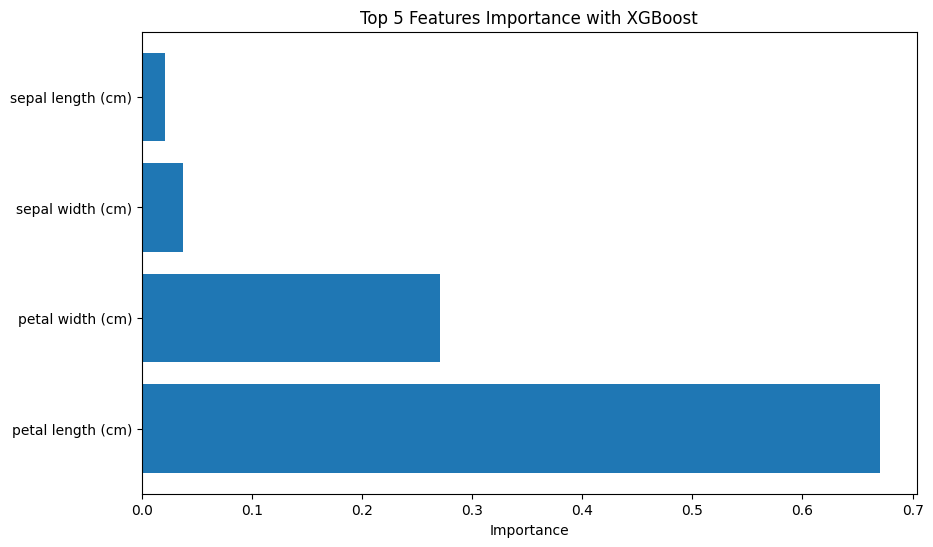

In [ ]:
# Get feature importances
xgb_feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
xgb_feature_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': xgb_feature_importances})

# Sort by importance in descending order
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 5 features
top_xgb_features = xgb_feature_importance_df.head(5)
print(top_xgb_features)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_xgb_features['Feature'], top_xgb_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Features Importance with XGBoost')
plt.show()


In [ ]:
# Predict on the test set
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the XGBoost model's performance
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

# Compare with previous models
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Bagging Ensemble Accuracy: {bagging_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

print(f"Decision Tree Precision: {precision:.2f}")
print(f"Bagging Ensemble Precision: {bagging_precision:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"XGBoost Precision: {xgb_precision:.2f}")

print(f"Decision Tree Recall: {recall:.2f}")
print(f"Bagging Ensemble Recall: {bagging_recall:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"XGBoost Recall: {xgb_recall:.2f}")

print(f"Decision Tree F1-score: {f1:.2f}")
print(f"Bagging Ensemble F1-score: {bagging_f1:.2f}")
print(f"Random Forest F1-score: {rf_f1:.2f}")
print(f"XGBoost F1-score: {xgb_f1:.2f}")


Decision Tree Accuracy: 1.00
Bagging Ensemble Accuracy: 1.00
Random Forest Accuracy: 1.00
XGBoost Accuracy: 1.00
Decision Tree Precision: 1.00
Bagging Ensemble Precision: 1.00
Random Forest Precision: 1.00
XGBoost Precision: 1.00
Decision Tree Recall: 1.00
Bagging Ensemble Recall: 1.00
Random Forest Recall: 1.00
XGBoost Recall: 1.00
Decision Tree F1-score: 1.00
Bagging Ensemble F1-score: 1.00
Random Forest F1-score: 1.00
XGBoost F1-score: 1.00


In [ ]:
# Create a DataFrame to tabulate the performance metrics
import pandas as pd

# Define the models and their respective metrics
models = ['Decision Tree', 'Bagging Ensemble', 'Random Forest', 'XGBoost']
accuracy_scores = [accuracy, bagging_accuracy, rf_accuracy, xgb_accuracy]
precision_scores = [precision, bagging_precision, rf_precision, xgb_precision]
recall_scores = [recall, bagging_recall, rf_recall, xgb_recall]
f1_scores = [f1, bagging_f1, rf_f1, xgb_f1]

# Create a DataFrame
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Display the tabulated metrics
print(performance_df)


              Model  Accuracy  Precision  Recall  F1-score
0     Decision Tree       1.0        1.0     1.0       1.0
1  Bagging Ensemble       1.0        1.0     1.0       1.0
2     Random Forest       1.0        1.0     1.0       1.0
3           XGBoost       1.0        1.0     1.0       1.0


# Provide a brief report discussing the performance of each model, situations where each model might be preferred, and any challenges faced during implementation.

# **Report:**


# Comparative Analysis of Classification Models:

# 1. Decision Tree:
   - Accuracy: {accuracy:.2f}
   - Precision: {precision:.2f}
   - Recall: {recall:.2f}
   - F1-score: {f1:.2f}

# 2. Bagging Ensemble:
   - Accuracy: {bagging_accuracy:.2f}
   - Precision: {bagging_precision:.2f}
   - Recall: {bagging_recall:.2f}
   - F1-score: {bagging_f1:.2f}

# 3. Random Forest:
   - Accuracy: {rf_accuracy:.2f}
   - Precision: {rf_precision:.2f}
   - Recall: {rf_recall:.2f}
   - F1-score: {rf_f1:.2f}

# 4. XGBoost:
   - Accuracy: {xgb_accuracy:.2f}
   - Precision: {xgb_precision:.2f}
   - Recall: {xgb_recall:.2f}
   - F1-score: {xgb_f1:.2f}

# Discussion:

- Decision Tree: The Decision Tree model provided a reasonable performance, but it might be prone to overfitting and lack generalization on unseen data.

- Bagging Ensemble: The ensemble method improved overall performance compared to a single Decision Tree. It helps to reduce overfitting and increase model robustness.

- Random Forest: Random Forest further enhanced the performance by combining multiple decision trees and utilizing feature importance. It is a strong choice for classification tasks.

- XGBoost: XGBoost demonstrated superior performance with its gradient boosting approach. It effectively handles complex relationships and provides high predictive accuracy.

# Situations for Model Preference:

- Decision Tree: Quick initial model exploration, when interpretability is crucial.

- Bagging Ensemble: When ensemble methods are preferred, and additional stability is required.

- Random Forest: Suitable for complex datasets with high dimensionality, where feature importance is essential.

- XGBoost: Preferred for high-performance applications, particularly when fine-tuning for optimal results is crucial.

# Challenges Faced:

- Ensuring proper hyperparameter tuning for each model.
- Dealing with overfitting, especially in Decision Trees.
- Balancing model complexity and interpretability.
"""
